**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.
Reanalyzing file assign.h5 for scheme TEST.
Reanalyzing file direct.h5 for scheme TEST.

Complete!
Setting iteration to iter 63.


In [2]:
total_iteration = 63

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink = -60.0

lifetime = 0.0
force_eval = 0.0  #in ps
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    force_eval += (tau-1)*w.current.walkers*0.02
    print 'total simulation time = ', force_eval, 'ps'
    
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink and l[j][tau-1] >= sink:
            it[i] += wts[j]
            #print wts[j]
            for k in range(tau):
                #print k
                if l[j][k] < sink and l[j][k+1] >= sink:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
                    break
            #break
    print flux
    flux_array.append(flux)
    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 0.0, lifetime/(sum(it)), 1.0, 0.0
f1.close()

Setting iteration to iter 1.
total simulation time =  2.0 ps
0.0
Setting iteration to iter 2.
total simulation time =  10.0 ps
0.0
Setting iteration to iter 3.
total simulation time =  18.0 ps
0.0
Setting iteration to iter 4.
total simulation time =  30.0 ps
2.3809523809523807e-05
Setting iteration to iter 5.
total simulation time =  44.0 ps
0.0010096813677617615
Setting iteration to iter 6.
total simulation time =  58.0 ps
0.0019150108068673455
Setting iteration to iter 7.
total simulation time =  70.0 ps
0.003497435781236708
Setting iteration to iter 8.
total simulation time =  84.0 ps
0.00497267526554931
Setting iteration to iter 9.
total simulation time =  98.0 ps
0.005570669094971489
Setting iteration to iter 10.
total simulation time =  112.0 ps
0.006122029636708969
Setting iteration to iter 11.
total simulation time =  128.0 ps
0.006458492220260109
Setting iteration to iter 12.
total simulation time =  144.0 ps
0.007646248052261232
Setting iteration to iter 13.
total simulation 

In [5]:
#print "MFPT = ", float(tau)/flux
w.current.walkers

80

Setting iteration to iter 50.


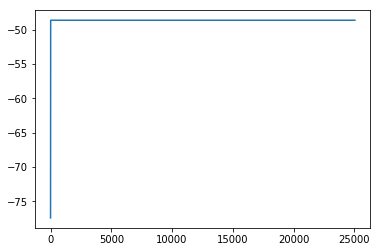

array([[-77.44    ],
       [-62.910004],
       [-62.120003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.640003],
       [-48.6

In [7]:
w.iteration = 50
final_trajectories = w.current.seg_id
traj_trace = w.trace(final_trajectories[9])
#print('What data can we access from our trace for segment {}?'.format(final_trajectories[45]))
#print(traj_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(traj_trace['pcoord'])
plt.show()
print traj_trace['pcoord']
print len(np.array(traj_trace['pcoord']))
#print traj_trace['pcoord'].shape()
#plt.plot(np.log10(traj_trace['weights']))
#plt.show()
#trajectory = traj_trace['pcoord']
#print trajectory

In [11]:
w.iteration = 1
w.current.bins
l1 = w.current.pcoord
print len(l1)
w.current

Setting iteration to iter 1.
10


['aggregate_walkers', 'auxdata', 'bins', 'color_prob_evolution', 'conditional_flux_evolution', 'direct', 'instant_matrix', 'iteration', 'matrix', 'maxweight', 'minweight', 'parent', 'parents', 'pcoord', 'rate_evolution', 'raw', 'reweight', 'seg_id', 'state_pop_evolution', 'states', 'successful_trajectories', 'summary', 'target_flux_evolution', 'total_fluxes', 'walkers', 'weights']

In [5]:
print it
f1 = open('FPTD.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()

[0.0, 0.0, 0.0, 0.0008333333333333333, 0.04888888888888889, 0.053055555555555564, 0.11182539682539681, 0.11924603174603175, 0.05620999999999999, 0.05768146825396825, 0.038897037037037036, 0.14988128306878307, 0.05295939153439154, 0.07340433421516754, 0.021992660567313346, 0.066236978707378, 0.01839939900548697, 0.019160401871448168, 0.012476893763472469, 0.022258428768327315, 0.009724567535759876, 0.007041385784097591, 0.010976970610119046, 0.008303421701331477, 0.004368337108891613, 0.0035365985758762995, 0.003480074673722191, 0.0012877507808545011, 0.004846145033038701, 0.002441309574218985, 0.0025344713894249397, 0.0024745960043260364, 0.0014362167096278178, 0.0020138029571755613, 0.0015350047723187922, 0.0011950304810399224, 0.00133149002397282, 0.0005949881168342036, 0.0014460152327568582, 0.0013101010408097995, 0.00018914718034989525, 0.0005569265686829768, 0.0008476193037157087, 0.0004714981058503535, 0.0006115426411569345, 0.0001464838981901222, 0.0004263571762479512, 5.1773295

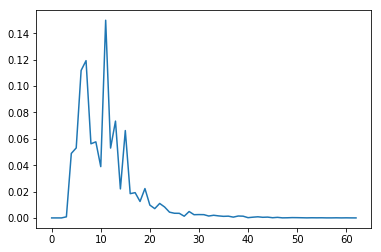

In [3]:
plt.plot(it)

In [16]:
w.iteration = 1000
sum(w.current.weights)

Setting iteration to iter 1000.


1.0

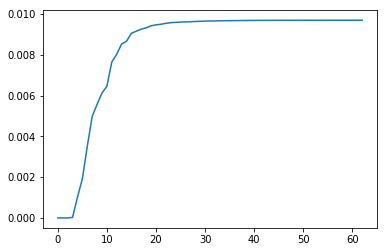

In [4]:
plt.plot(flux_array)